In [1]:
import numpy as np
import matplotlib.pyplot as plt

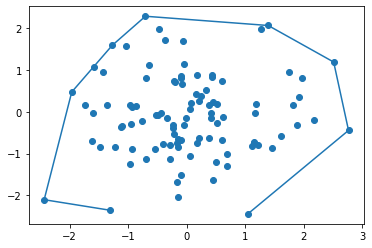

In [2]:
# for later to draw leaf margin in more complex shapes, without sorting all points
from scipy.spatial import ConvexHull

# RANDOM DATA
x = np.random.normal(0,1,100)
y = np.random.normal(0,1,100)
xy = np.hstack((x[:,np.newaxis],y[:,np.newaxis]))

# PERFORM CONVEX HULL
hull = ConvexHull(xy)

# PLOT THE RESULTS
plt.scatter(x,y)
plt.plot(x[hull.vertices], y[hull.vertices])
plt.show()

# General Approach
1. convergence points emerge when sufficient space becomes available between cp on cell margin (Hofmeister's rule).
    - create threshold paramter for when cp appear (th_cp)
    - for this measure red distance on leaf margin
    - new convergence points modify the biological composition and influence shap (hormones present and where to place the red line's new start point etc)
2. introduce new strand where cp is added
    - "portion of the margin falling within the threshold distance d_axes of the cp point are associated with the new veins"
    - this means that the next interval is split in two to decide when there will be a new cp where. (light green areas in figure 6.2 of Runions 2014 thesis)
3. veins grow in the direction they are pointing and take with them the nearest margin points
    - stretching and bending of margin are minimized, to avoid deformation of margin that occurs from vein growth
    - this damping of stretching is decided locally based on compounds in cells locally

<img src="img/LeafModelDefinition.png" alt="Leaf Visualization (Runions, 2014)" width="40%" height="40%">

In [3]:
# helper functions

class Point:
    def __init__(self, pos, is_cp, vein_assoc, has_morphogen):
        self.pos = pos
        self.is_cp = is_cp
        self.vein_assoc = vein_assoc
        self.has_morphogen = has_morphogen

def print_points(points):    
    for i in range(0,len(points)):
        print(str(i) +"   " + ', '.join("%s: %s" % item for item in vars(points[i]).items())) #print class data

def get_points_pos(list_of_points):
    x_pos = []
    y_pos = []
    pos = []
    for point in list_of_points:
            pos.append(point.pos)
            x_pos.append(point.pos[0])
            y_pos.append(point.pos[1])
    return x_pos, y_pos, pos

def plot_leaf(all_veins, margin, all_cp):
    """Plots an image of the leaf's veins, convergence points and margin."""
    
    x_vein = []
    y_vein = []
    for vein in all_veins:
        temp_vein_pos = get_points_pos(vein)
        x_vein.append(temp_vein_pos[0])
        y_vein.append(temp_vein_pos[1])
    
    x_margin,y_margin, margin_pos = get_points_pos(margin)  
    x_cp, y_cp, pos_cp = get_points_pos(all_cp)
    
    for cp in all_cp:
        if cp.vein_assoc == base_point:
            continue
        else:
            cp_x, cp_y = cp.pos
            attach_x, attach_y = cp.vein_assoc.pos
            plt.plot([cp_x, attach_x], [cp_y, attach_y], 'bo-')
            
    plt.plot(x_vein, y_vein, 'bo')
    plt.plot(x_margin, y_margin, '-ko')
    plt.plot(x_cp, y_cp, 'yo')
    plt.axis([-7, 7, 0, 7])
    plt.show()
    return temp_vein_pos[2], margin_pos 

# proof of concept approach:

Problem, the actual math results in approximately 3000 lines of code in C++, so that would def be overkill? Maybe try using parametric sliders in growth? Might even be more intuitive for technical artists. I'd say it's worth a try even though it's not very mathematically significant, but might be good enough for 3D production

## step 1 
- create basic leaf shape (can even be a circle), with primordium
- create test margin with 1cp
- create points on primordium

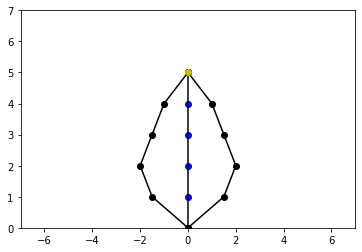

0   pos: [0, 5], is_cp: 1, vein_assoc: <__main__.Point object at 0x000001C89B61D7C0>, has_morphogen: 0


In [4]:
# initialize convergence points    
all_cp = []

# create primordium vein
base_point = Point([0,0], 0, 0, 0)
primordium_vein = [base_point]
has_morphogen = 0

for i in range(6):
    if i == 0: #skip base_point
        continue
    elif i == 5:
        is_cp = 1
        new_point = Point([0, i], is_cp, base_point, has_morphogen)
        all_cp.append(new_point)
    else:
        is_cp = 0
        new_point = Point([0, i], is_cp, base_point, has_morphogen)   
    primordium_vein.append(new_point)
    
# create margin
margin = []
width_points = [0,1.5, 2, 1.5,1,0]
for i in [-1,1]:
    for j in range(6):
        if j == 0:
            new_point = base_point
        elif j == 5:
            new_point = primordium_vein[-1]
        else:
            x = i * width_points[j] 
            is_cp = 0
            has_morphogen = 0
            new_point = Point([x, j], is_cp, base_point, has_morphogen)
        
        margin.append(new_point)
margin[6:11] = reversed(margin[6:11])  # Reverse, So margin is one continuous line

# --------------------------------------------------------

plot_leaf([primordium_vein], margin, all_cp)

# print_points(margin)
print_points(all_cp)

## step 2

- vein insertion (neirest neighbours sklearn? euclidean distance ?)

0   pos: [0, 5], is_cp: 1, vein_assoc: <__main__.Point object at 0x000001C89B61D7C0>, has_morphogen: 0


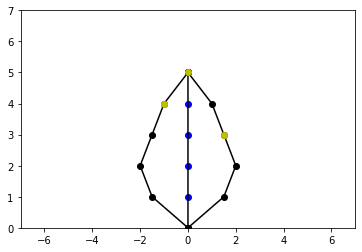

0   pos: [0, 5], is_cp: 1, vein_assoc: <__main__.Point object at 0x000001C89B61D7C0>, has_morphogen: 0
1   pos: [-1, 4], is_cp: 1, vein_assoc: <__main__.Point object at 0x000001C89B61D7C0>, has_morphogen: 0
2   pos: [1.5, 3], is_cp: 1, vein_assoc: <__main__.Point object at 0x000001C89B61D7C0>, has_morphogen: 0


3

In [5]:
# create new cp for vein insertion
# this is temporarily hard coded for poc, later done dynamically based on threshold during growth

print_points(all_cp)

margin[4].is_cp = 1
margin[7].is_cp = 1

all_cp.append(margin[4])
all_cp.append(margin[7])

primordium_vein_pos, margin_pos = plot_leaf([primordium_vein], margin, all_cp)

print_points(all_cp)

len(all_cp)


### decide between two options:

1.  calculate distance from cp to the clossest point on a vein. The closest point will be chosen as an attachment point for new vein.
    - downside: this limits you to a finite set of points, when do you create new ones, maybe less accurate
    - upside: arguably quicker and more simplified?
 
2. draw a line for each surrounding vein(start point to finish point),calculate shortest distances between cp and these lines, lowest distance is where attachment happens
    - more accurate
    - complexer implication
    - numerically harder computations (more veins to calculate), have to store line start and end points etc
    
For vein insertion I currently implemented number 1. First decide how to store veins (just as points and some endpoints marked or as seperate lists, creating a tree hierarchy?(maybe the tree would be neatest even though more computationally expensive)

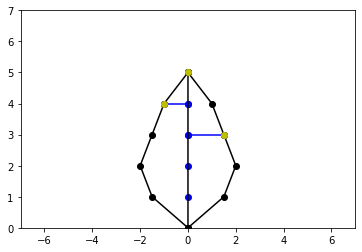

In [6]:
from sklearn.metrics.pairwise import euclidean_distances

def find_shortest_path(all_cp, vein):
    
    _,_, all_cp_pos = get_points_pos(all_cp)
    _, _, vein_pos = get_points_pos(vein)
    euc_res = euclidean_distances(all_cp_pos, vein_pos)
    min_index = np.argmin(euc_res, axis=1)
    return min_index, euc_res

def connect_newcp( all_cp, vein):
    
    min_index, euc_res = find_shortest_path(all_cp, vein)
    for i in range(0, len(all_cp)):
        distance = euc_res[i,min_index[i]]
        if distance == 0:  #skip if already connected to a vein
            continue
        else:
            all_cp[i].vein_assoc = vein[min_index[i]]

connect_newcp(all_cp, primordium_vein)          
primordium_vein_pos, margin_pos = plot_leaf([primordium_vein], margin, all_cp)


## step 3

create simple polar growth along vein axis
- try to implement nearest points growing faster with normalized growth distance?
    - this should be subtle because vein insertion should happen before the shape morphs too much
- think about stretching, now or later?


    
approach:
- get two points == vector
- multiply by scalar growth rate gr
- set new points to new end point
- start point should stay the same

then:
- simultaneously grow all points but calculate growth rate per vein by distance to other veins (in example top should grow quicker than the right vein, because they are together)
- also calculate for margin points that aren't a cp

<img src="img/VeinElongation.png" alt="Vein Elongation (Runions, 2014)" width="40%" height="40%">

0   pos: [ 0. 59.], is_cp: 1, vein_assoc: <__main__.Point object at 0x000001C89B61D7C0>, has_morphogen: 0
1   pos: [-55.   4.], is_cp: 1, vein_assoc: <__main__.Point object at 0x000001C89B61D190>, has_morphogen: 0
2   pos: [55.5  3. ], is_cp: 1, vein_assoc: <__main__.Point object at 0x000001C89B61D100>, has_morphogen: 0
0   pos: [ 0. 62.], is_cp: 1, vein_assoc: <__main__.Point object at 0x000001C89B61D7C0>, has_morphogen: 0
1   pos: [-58.   4.], is_cp: 1, vein_assoc: <__main__.Point object at 0x000001C89B61D190>, has_morphogen: 0
2   pos: [58.5  3. ], is_cp: 1, vein_assoc: <__main__.Point object at 0x000001C89B61D100>, has_morphogen: 0


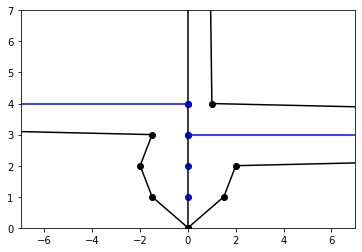

In [26]:
# from sklearn.preprocessing import normalize
print_points(all_cp)
# can later be scaled differently dependent on auxin etc
gr = np.ones(len(all_cp))
# print(gr)

def normalize_vein(x):
    norm_x = x/np.sqrt((x**2).sum())
    return norm_x

def expand_veins(all_cp, gr):
#     gv = np.zeros((len(all_cp), 2))
    veins = []
    for i in range(0, len(all_cp)):
        cp = all_cp[i]
        vein = np.array(cp.pos) - np.array(cp.vein_assoc.pos) 
        dir = normalize_vein(vein)
        cp.pos = cp.pos + (3 * dir)

# print((np.array([0, 1][0,0])*1))
expand_veins(all_cp, gr)
print_points(all_cp)
# np.array(vein)
# print(np.zeros((2, 3)))

primordium_vein_pos, margin_pos = plot_leaf([primordium_vein], margin, all_cp)

In [8]:
# find nearest neighbour point on vein (choosing between veins won't be necessary due to cell splitting regions?) - DOUBLE CHECK ASSUMPTION

# example from sklearn as a reminder IGNORE
from sklearn.neighbors import KDTree
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
kdt = KDTree(X, leaf_size=30, metric='euclidean')
kdt.query(X, k=2, return_distance=False)

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]], dtype=int64)

## step 4: Next week!

- more complex growth methods both or choose 1?:
    - find path to closest vein -> the longer the travel the longer the auxin travels
    - expand according to morphogens -> expands more or indent at morphogen points 